In [3]:
from google.cloud import bigquery
import pandas as pd


project_id = 'trusty-drive-434711-g9'
client = bigquery.Client(project=project_id)

# Query to fetch the transformed data for sample month June, 2023
query = """
    SELECT pickup_zone, drop_zone, pickup_datetime, dropOff_datetime, trip_type,file_month
    FROM `trusty-drive-434711-g9.nyc_taxi.trip_data_consolidated`
    WHERE file_month = '2023-06-01'
"""

df = client.query(query).to_dataframe()
# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

# Data types
print(df.dtypes)

           pickup_zone              drop_zone           pickup_datetime  \
0  Morningside Heights    Morningside Heights 2023-06-28 13:52:49+00:00   
1  Morningside Heights  Upper West Side North 2023-06-30 23:06:30+00:00   
2  Morningside Heights  Upper West Side South 2023-06-09 12:19:46+00:00   
3        East Elmhurst                Astoria 2023-06-20 07:24:14+00:00   
4    Battery Park City           Clinton East 2023-06-04 12:26:53+00:00   

           dropOff_datetime    trip_type  file_month  
0 2023-06-28 13:56:35+00:00  YELLOW TRIP  2023-06-01  
1 2023-06-30 23:14:18+00:00  YELLOW TRIP  2023-06-01  
2 2023-06-09 12:35:27+00:00  YELLOW TRIP  2023-06-01  
3 2023-06-20 07:39:16+00:00  YELLOW TRIP  2023-06-01  
4 2023-06-04 12:53:22+00:00  YELLOW TRIP  2023-06-01  
       pickup_zone       drop_zone                   pickup_datetime  \
count     23958848        23958848                          23958848   
unique         263             263                               NaN   
top

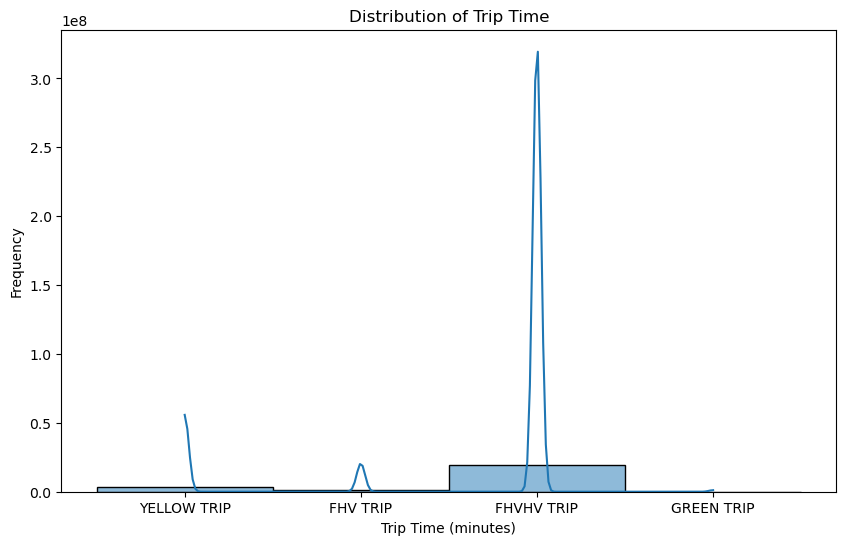

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of trip_time
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_type'], bins=50, kde=True)
plt.title('Distribution of Trip Time')
plt.xlabel('Trip Time (minutes)')
plt.ylabel('Frequency')
plt.show()

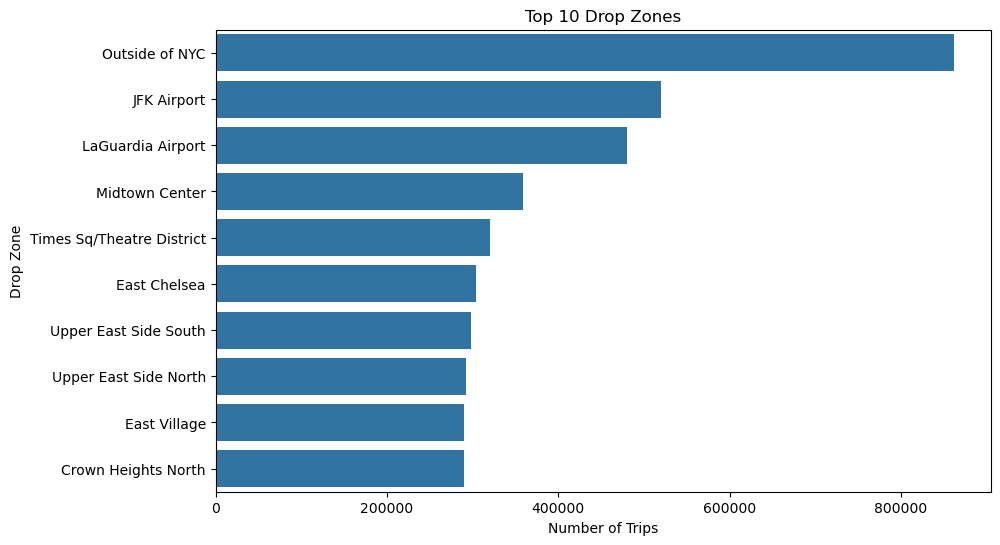

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['drop_zone'], order=df['drop_zone'].value_counts().index[:10])
plt.title('Top 10 Drop Zones')
plt.xlabel('Number of Trips')
plt.ylabel('Drop Zone')
plt.show()

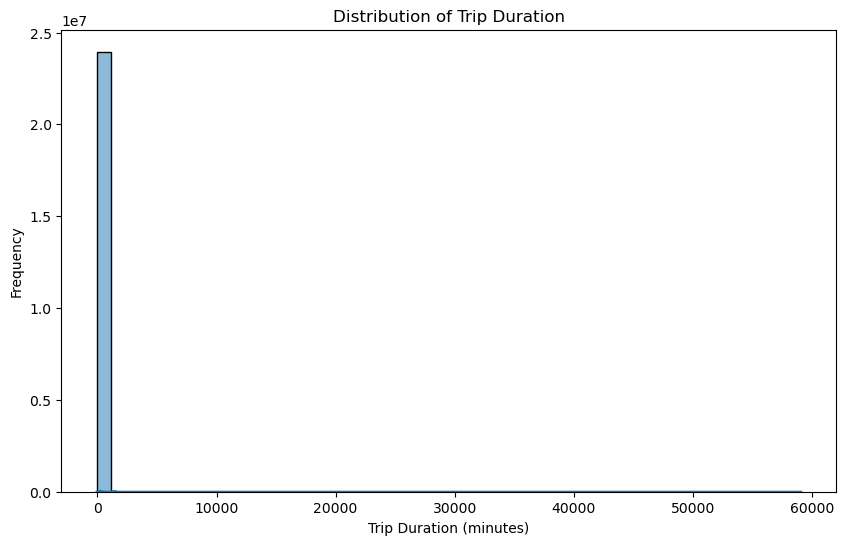

In [9]:
# Distribution of Trip Times

# Calculate trip duration in minutes
df['trip_duration'] = (df['dropOff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

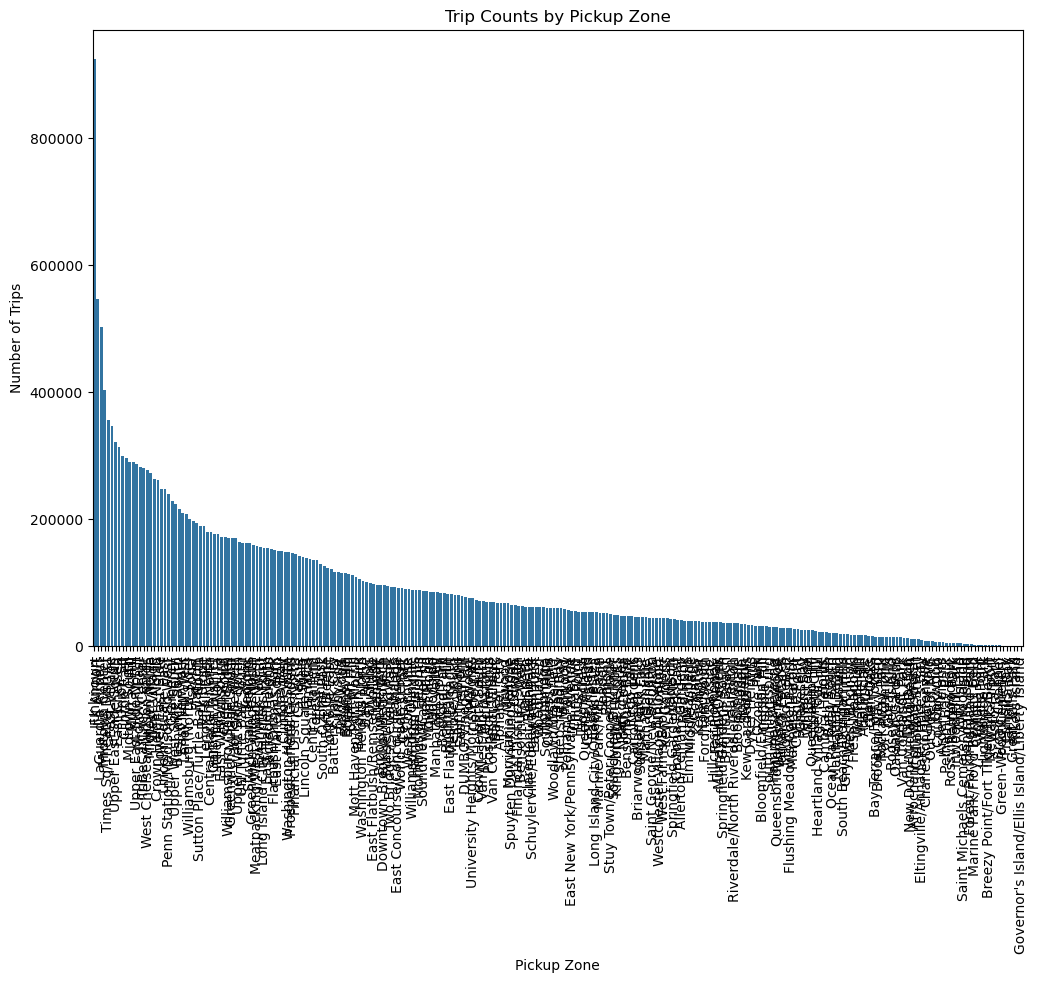

In [10]:
# Plot counts by pickup zone
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='pickup_zone', order=df['pickup_zone'].value_counts().index)
plt.title('Trip Counts by Pickup Zone')
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()

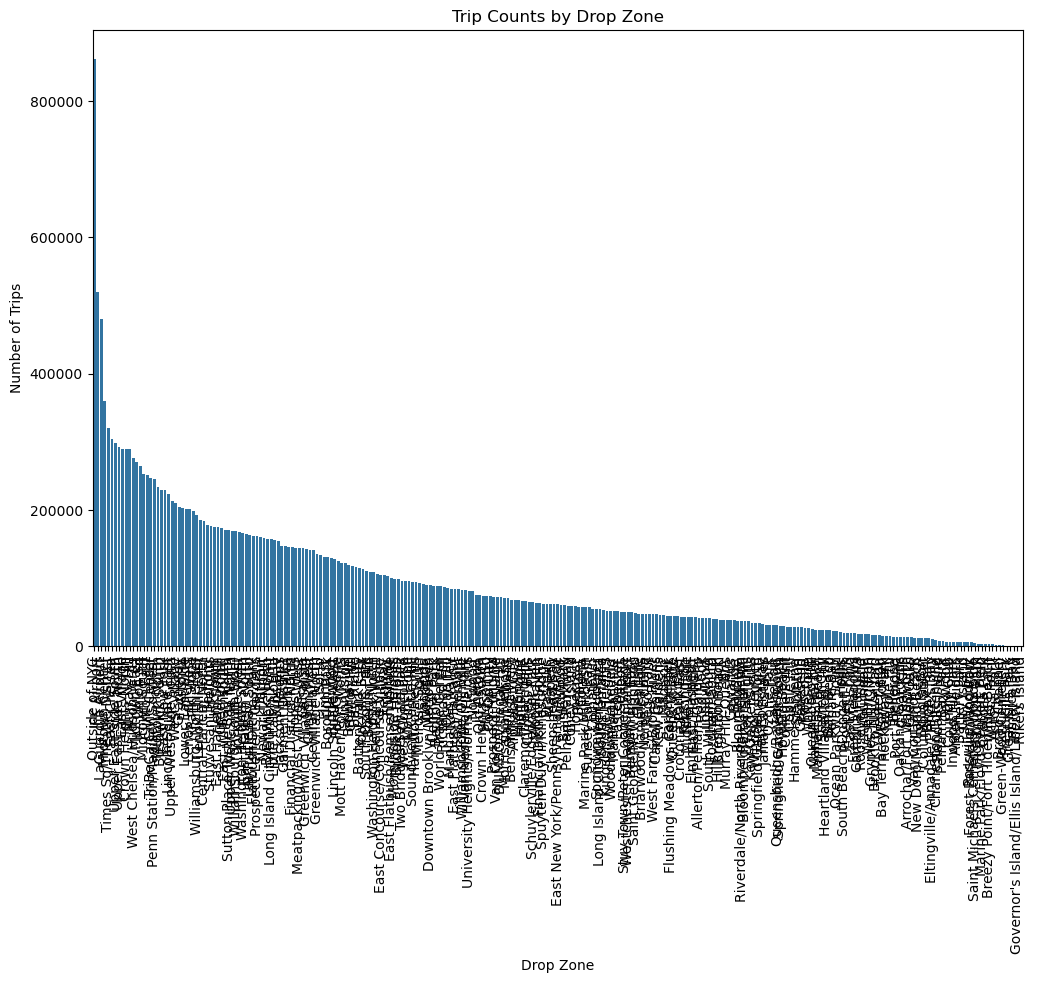

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot counts by drop zone
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='drop_zone', order=df['drop_zone'].value_counts().index)
plt.title('Trip Counts by Drop Zone')
plt.xlabel('Drop Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()